In [2]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()
model = ChatOpenAI(model="gpt-4o", temperature=0.01)
model.invoke("안녕하세요")

d:\doitLLM_book_test\DoitLLM\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-D2A5431YNfpGhabQySnuGX1mJOyrX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bf8ec-0c3c-7c00-8ed5-739fdeb75ada-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
#상태 설정
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
        State클래스는 TypeDict를 상속받습니다.

        속성:
            mesages(Annotated[list[str], add_messages]) : 메시지들은 "list"타입을 가집니다.
            'add_messages' 함수는 이 상태 키가 어떻게 업데이트 되어야 하는지를 정의합니다.
            (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다) 
    """

    messages : Annotated[list[str], add_messages]

graph_builder = StateGraph(State)


In [4]:
#도구 등록
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4
from langchain_community.document_loaders import WebBaseLoader

@tool
def get_current_time(timezone: str, location: str) -> str:
    """현재 시각을 반환하는 함수"""
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f'{timezone} ({location}) 현재 시각 {now}'
        print(result)
        return result
    except pytz.UnknownTimeZoneError:
        return f"알 수 없는 타임존: {timezone}"

@tool
def get_web_search(query: str, search_period: str='m') -> str:
    """
        웹 검색을 수행하는 함수

        Args : 
        query(str) : 검색어
        search_period (str) : 검색기간 (e.g., "w" for past week, "m" for past month, "y" for past year)
    """
    wrapper = DuckDuckGoSearchAPIWrapper( time=search_period)
    
    print('--------WEB SEARCH-------------')
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        results_separator=';\n'
    )

    searched= search.invoke(query)

    for i, result in enumerate(searched.split(';\n')):
        print(f'{i+1}, {result}')

    return searched


#도구 바인딩
tools = [get_current_time, get_web_search]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
tools[0].invoke({"timezone":"Asia/Seoul", "location" : "서울"})


Asia/Seoul (서울) 현재 시각 2026-01-26 15:09:44


'Asia/Seoul (서울) 현재 시각 2026-01-26 15:09:44'

In [6]:
tools[1].invoke({"query":"파이썬", "search_period" : "m"})


--------WEB SEARCH-------------
파이썬
m
1, snippet: 1 day ago - Python is a high-level, general-purpose programming language . Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly ..., title: Python (programming language) - Wikipedia, link: https://en.wikipedia.org/wiki/Python_(programming_language)
2, snippet: 2 weeks ago - Python (/ˈpaɪθɑːn/) là ngôn ngữ lập trình bậc cao đa năng . Triết lý thiết kế của nó nhấn mạnh khả năng đọc mã bằng cách sử dụng thụt lề đáng kể. Python có kiểu động và thu gom rác. Ngôn ngữ này hỗ trợ nhiều mô hình lập ..., title: Python (ngôn ngữ lập trình) – Wikipedia tiếng Việt, link: https://vi.wikipedia.org/wiki/Python_(ngôn_ngữ_lập_trình)
3, snippet: 2 weeks ago - ) เป็นอินเทอร์พรีเตอร์ภาษาระดับสูง ซึ่งสร้างโดยคีโด ฟัน โรสซึม โดยเริ่มใน พ.ศ. 2533 การออกแบบของภาษาไพทอนมุ..., title: ภาษาไพท

'snippet: 1 day ago - Python is a high-level, general-purpose programming language . Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly ..., title: Python (programming language) - Wikipedia, link: https://en.wikipedia.org/wiki/Python_(programming_language);\nsnippet: 2 weeks ago - Python (/ˈpaɪθɑːn/) là ngôn ngữ lập trình bậc cao đa năng . Triết lý thiết kế của nó nhấn mạnh khả năng đọc mã bằng cách sử dụng thụt lề đáng kể. Python có kiểu động và thu gom rác. Ngôn ngữ này hỗ trợ nhiều mô hình lập ..., title: Python (ngôn ngữ lập trình) – Wikipedia tiếng Việt, link: https://vi.wikipedia.org/wiki/Python_(ngôn_ngữ_lập_trình);\nsnippet: 2 weeks ago - ) เป็นอินเทอร์พรีเตอร์ภาษาระดับสูง ซึ่งสร้างโดยคีโด ฟัน โรสซึม โดยเริ่มใน พ.ศ. 2533 การออกแบบของภาษาไพทอนมุ..., title: ภาษาไพทอน - วิกิพีเดีย, link: https://th.wikipedi

In [7]:
for tool in tools:
    print(tool.name,tool)
model_with_tools = model.bind_tools(tools)

get_current_time name='get_current_time' description='현재 시각을 반환하는 함수' args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x000001A75F712660>
get_web_search name='get_web_search' description='웹 검색을 수행하는 함수\n\nArgs : \nquery(str) : 검색어\nsearch_period (str) : 검색기간 (e.g., "w" for past week, "m" for past month, "y" for past year)' args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x000001A73984CFE0>


In [8]:


def generate(state: State):
    """
        주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

        매개변수:
        state(State) : 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

        반환값:
        dict :모델이 생성한 응답 메시지를 포함하는 딕셔너리.
            형식은 {"messages": [응답 메시지]}입니다.
    """

    return {"messages":[model.invoke(state["messages"])]}

graph_builder.add_node("generate",generate)


In [9]:
#BasicToolNode클래스는 AIMessage 에서 도구 요청이 있을떄 이를 실행시키는 역할
#도구를 사용하는 노드클래스 생성
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
        도구를 실행하는 노드 클래스. 마지막 AIMessage에서 요청된 도구를 실행
        Attributes:
            tool_by_name (dict) : 도구 이름을 키로하고 도구 객체를 값으로 가지는 사전
        Methods:
            __init__ (tools: list) : 도구 객체들의 리스트를 받아서 초기화
            __call__(imputs: dict) : 입력 메시지를 받아서 도구를 실행하고 결과 메시지를 반환

    """
    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name : tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages",[]):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        
        outputs = []

        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content = json.dumps(tool_result),
                    name = tool_call["name"],
                    tool_call_id = tool_call["id"]

                )
            )
        return {"messages" : messages + outputs}

tool_node = BasicToolNode(tools=tools)

graph_builder.add_node("tools",tool_node)

In [10]:
#언어 모델이 도구 사용 여부를 판단하도록 라우터 설정
def route_tools(state: State):
    """
        마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
        그렇지 않은 경우 끝으로 라우팅하기 위해 conditional_edge에서 사용함.
    """
    if isinstance(state,list):
        ai_message = state[-1]
    elif messages := state.get("messages",[]):
        ai_message = messages[-1]
    else:
        raise ValueError(f"tool_edge 입력 사애에서 메시지를 찾을 수 없습니다: {state}")
    if hasattr(ai_message,"tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    
    return END

graph_builder.add_edge(START,"generate")

graph_builder.add_conditional_edges(
    "generate",
    route_tools,
    {"tools":"tools", END : END}
)

graph_builder.add_edge("tools","generate")
graph = graph_builder.compile()


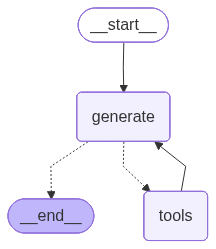

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content = "지금 서울 몇 시야?")]

gathered = None

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content,end='')

        if gathered is None:
            gathered = msg
        else:
            gathered = gathered+ msg

gathered

죄송하지만, 현재 시간을 확인할 수 없습니다. 사용 중인 기기나 서비스를 통해 시간을 확인해 보시기 바랍니다.

AIMessageChunk(content='죄송하지만, 현재 시간을 확인할 수 없습니다. 사용 중인 기기나 서비스를 통해 시간을 확인해 보시기 바랍니다.', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'stop', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'service_tier': 'default'}, id='lc_run--019bf8ec-2eef-71d3-8738-bf89c7918b0e', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 14, 'output_tokens': 27, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[], chunk_position='last')

In [14]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = "서울 월드컵 경기장 잔디 문제"

inputs = [SystemMessage(content=f"""
    너는 신문기자이다.
    최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.

    - 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘.
    - 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐.
    - 검색할 리스트를 토대로 재검색해.
    - 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해.
    - 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋아.

    더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성한다.
    제목,부제,리드문, 본문의 구성으로 작성한다. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성해야 한다.

""")]

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')
    

### 최근 이슈 검색 및 주제 선정

최근 서울 월드컵 경기장의 잔디 상태가 축구 경기와 관련하여 큰 논란이 되고 있습니다. 특히, 잔디의 품질이 경기의 질에 영향을 미치고 있다는 비판이 제기되고 있습니다. 이 문제는 축구 팬들뿐만 아니라 선수들, 코칭 스태프, 그리고 경기장 관리 당국까지 다양한 이해관계자들에게 영향을 미치고 있습니다. 

**선정 주제:** "서울 월드컵 경기장 잔디 문제: 경기력 저하와 관리 부실의 악순환"

**선정 이유:** 
- 경기장의 잔디 상태는 경기의 질과 선수들의 안전에 직접적인 영향을 미칩니다.
- 최근 국제 경기에서도 잔디 문제로 인해 비판을 받았으며, 이는 서울의 국제적 이미지에도 영향을 미칠 수 있습니다.
- 잔디 관리의 부실함이 반복되고 있는 이유와 해결 방안을 심층적으로 분석할 필요가 있습니다.

### 원고 작성 목차 및 추가 검색 내용

1. **서론: 서울 월드컵 경기장의 잔디 문제 개요**
   - 최근 경기에서의 잔디 상태에 대한 비판 사례
   - 잔디 상태가 경기력에 미치는 영향

2. **본론 1: 잔디 관리의 문제점**
   - 잔디 관리의 현재 시스템 및 절차
   - 관리 부실의 원인 분석

3. **본론 2: 잔디 문제의 영향**
   - 선수 및 코칭 스태프의 의견
   - 경기력 및 안전성에 미치는 영향

4. **본론 3: 해외 사례와 비교**
   - 해외 주요 경기장의 잔디 관리 사례
   - 서울 월드컵 경기장과의 비교 분석

5. **결론: 해결 방안 및 제언**
   - 잔디 관리 개선을 위한 제언
   - 장기적인 해결 방안 모색

**추가 검색 내용 리스트:**
- 최근 서울 월드컵 경기장에서 열린 경기에서의 잔디 상태 관련 뉴스 및 비판 사례
- 서울 월드컵 경기장의 잔디 관리 시스템 및 절차
- 선수 및 코칭 스태프의 잔디 상태에 대한 인터뷰나 의견
- 해외 주요 경기장의 잔디 관리 사례 및 시스템
- 잔디 관리 개선을 위한 전문가 의견 및 제언

### 검색 및 정보 수